In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# import warnings
# warnings.filterwarnings("ignore")

### Import and read data

In [2]:
auto_df = pd.read_csv("./auto-mpg-processed.csv")
auto_df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.0,8,307.0,130,3504,12.0,49
1,15.0,8,350.0,165,3693,11.5,49
2,18.0,8,318.0,150,3436,11.0,49
3,16.0,8,304.0,150,3433,12.0,49
4,17.0,8,302.0,140,3449,10.5,49


In [3]:
auto_df.shape

(392, 7)

### Instantiate a dict for models performance

In [4]:
result_dict = {}

### Def a function for different algorithms

In [5]:
def build_model(regression_fn, label, features, DF, test_frac=0.2, preproc_fn=None, show_plot=False):
    X =  DF[features]
    Y = DF[label] 
    
    if preproc_fn is not None:
        X = preproc_fn(X)
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
    
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    print("Training score", model.score(x_train, y_train))
    print("Testing score", r2_score(y_pred, y_test))
    
    if show_plot is not False:

        plt.figure(figsize=(12, 8))
        
        plt.plot(y_pred, label='Predicted')
        plt.plot(y_test.values, label='Actual')
        
        plt.ylabel(label)

        plt.legend()
        plt.show()
    
    return {
            'training_score': model.score(x_train, y_train),
            'testing_score': r2_score(y_test, y_pred)
           } 

    

### Compare all the regression models 

In [6]:
def compare_results():
    for key in result_dict:
        print("Model", key)
        print("training score", result_dict[key]["training_score"])
        print("testing score", result_dict[key]["testing_score"])
        print()

In [7]:
def linear_regression(x_train, y_train):
    lr = LinearRegression(normalize=True)
    lr.fit(x_train, y_train)
    return lr

Training score 0.7025085988323205
Testing score 0.6455479699929298


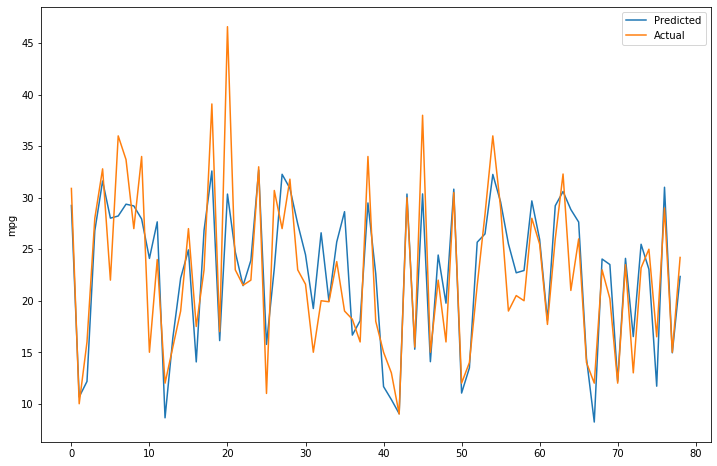

In [8]:
result_dict["linear regression - kitchen sink"] = build_model(
                                                      linear_regression, 
                                                      'mpg',
                                                      ['cylinders',
                                                      'displacement',
                                                      'horsepower',
                                                      'weight',
                                                      'acceleration'], 
                                                      auto_df,
                                                      show_plot=True
                                                       )

### Lasso regression fn  alpha default to 1, 0 = usual MSE

In [9]:
def lasso_regression(x_train, y_train, alpha=0.5):
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    
    return model

Training score 0.6982171524548322
Testing score 0.5892077046152053


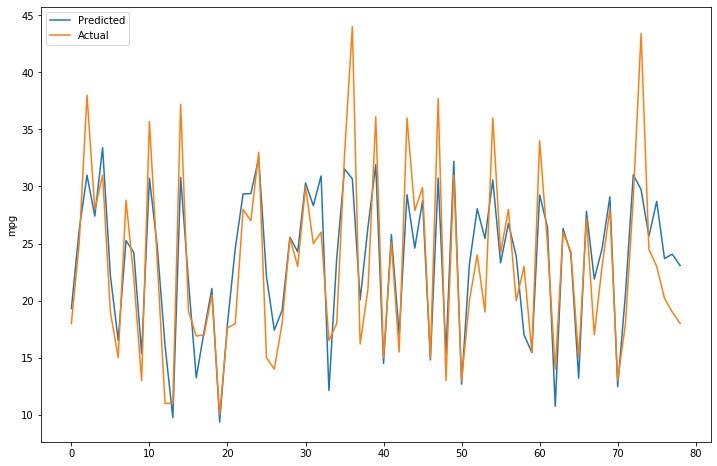

In [10]:
result_dict["lasso regression"] = build_model(
                                              lasso_regression, 
                                              'mpg',
                                              ['cylinders',
                                              'displacement',
                                              'horsepower',
                                              'weight',
                                              'acceleration'], 
                                              auto_df,
                                              show_plot=True
                                               )

### Ridge regression 

In [11]:
def ridge_regression(x_train, y_train, alpha=0.5):
    model = Ridge(alpha=alpha, normalize=True)
    model.fit(x_train, y_train)
    
    return model

Training score 0.678031614115456
Testing score 0.5961992690806159


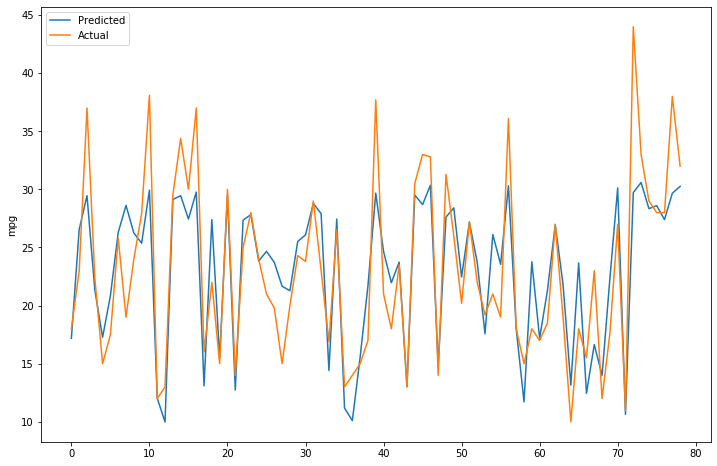

In [12]:
result_dict["ridge regression"] = build_model(
                                              ridge_regression, 
                                              'mpg',
                                              ['cylinders',
                                              'displacement',
                                              'horsepower',
                                              'weight',
                                              'acceleration'], 
                                              auto_df,
                                              show_plot=True
                                               )

In [13]:
compare_results()

Model linear regression - kitchen sink
training score 0.7025085988323205
testing score 0.7201352095367597

Model lasso regression
training score 0.6982171524548322
testing score 0.7386857046638862

Model ridge regression
training score 0.678031614115456
testing score 0.7305772956337155



### Elastic Net Regression

In [14]:
def elastic_net_regression(x_train, y_train, alpha=1, l1_ratio=0.5):
    model = ElasticNet(alpha=alpha, normalize=False, max_iter=100000, l1_ratio=l1_ratio, warm_start=True)
    model.fit(x_train, y_train)
    
    return model

Training score 0.7142523225051023
Testing score 0.5702687125175332


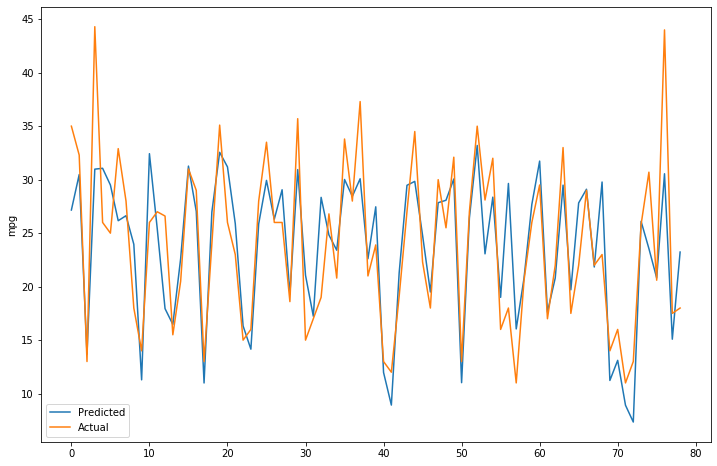

In [15]:
result_dict["elastic net regression"] = build_model(
                                              elastic_net_regression, 
                                              'mpg',
                                              ['cylinders',
                                              'displacement',
                                              'horsepower',
                                              'weight',
                                              'acceleration'], 
                                              auto_df,
                                              show_plot=True
                                               )

### SVR model

In [16]:
def svr(x_train, y_train, kernel="linear",epsilon=0.05, C=0.3):
    model = SVR(kernel=kernel, epsilon=epsilon, C=C)
    model.fit(x_train, y_train)
    return model

Training score 0.7034586455526612
Testing score 0.5124355194184634


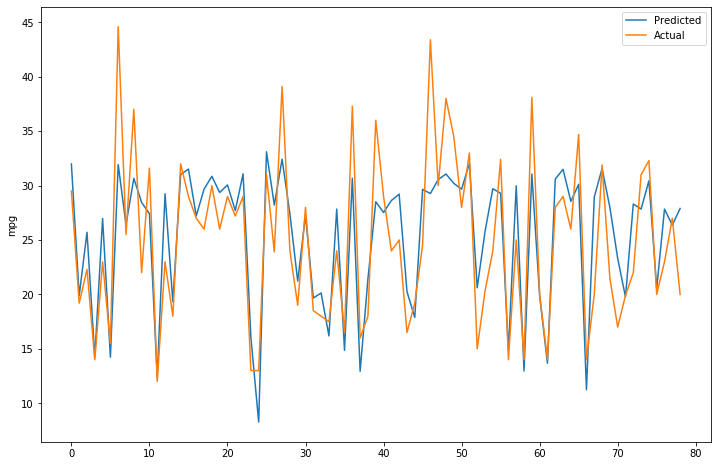

In [17]:
result_dict["SVR"] = build_model(
                                  svr, 
                                  'mpg',
                                  ['cylinders',
                                  'displacement',
                                  'horsepower',
                                  'weight',
                                  'acceleration'], 
                                  auto_df,
                                  show_plot=True
                                               )

### K-NN model

In [18]:
def k_nn(x_train, y_train, n_neighbors = 10):
    model = KNeighborsRegressor(n_neighbors = n_neighbors)
    model.fit(x_train, y_train)
    return model

Training score 0.7355779180861217
Testing score 0.7830702121181319


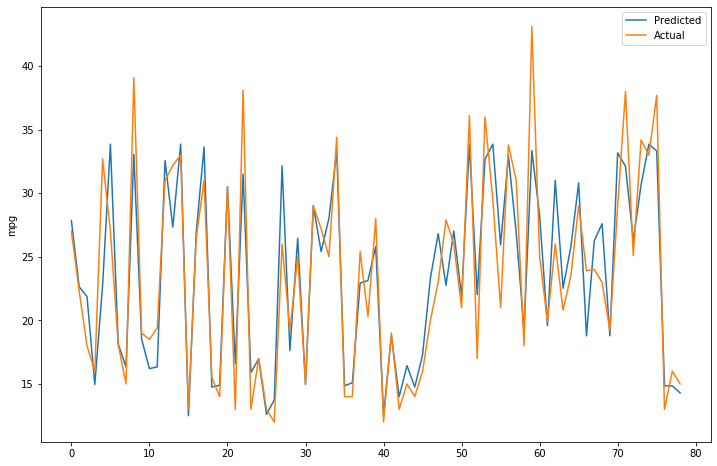

In [19]:
result_dict["k-nn"] = build_model(
                                  k_nn, 
                                  'mpg',
                                  ['cylinders',
                                  'displacement',
                                  'horsepower',
                                  'weight',
                                  'acceleration'], 
                                  auto_df,
                                  show_plot=True
                                               )

### SGD model

In [20]:
def sgd_regression(x_train, y_train):
    model = SGDRegressor(max_iter=10000, tol=1e-3)
    model.fit(x_train, y_train)
    return model

### Standard data

In [21]:
def standard_data(x):
    scaler = StandardScaler()
    scaler.fit(x)
    return scaler.transform(x)

Training score 0.7142866924993725
Testing score 0.5228733693450542


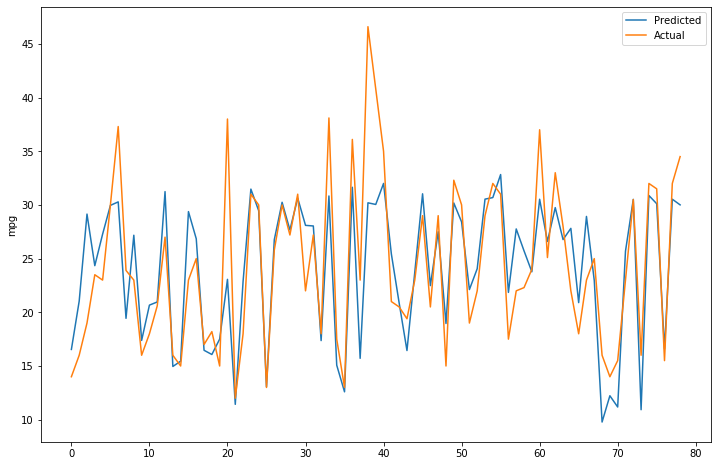

In [22]:
result_dict["sgd"] = build_model(
                                  sgd_regression, 
                                  'mpg',
                                  ['cylinders',
                                  'displacement',
                                  'horsepower',
                                  'weight',
                                  'acceleration'], 
                                  auto_df,
                                  preproc_fn=standard_data,
                                  show_plot=True
                                               )

In [23]:
compare_results()

Model linear regression - kitchen sink
training score 0.7025085988323205
testing score 0.7201352095367597

Model lasso regression
training score 0.6982171524548322
testing score 0.7386857046638862

Model ridge regression
training score 0.678031614115456
testing score 0.7305772956337155

Model elastic net regression
training score 0.7142523225051023
testing score 0.6710700059306178

Model SVR
training score 0.7034586455526612
testing score 0.6642301631539123

Model k-nn
training score 0.7355779180861217
testing score 0.8263731259434801

Model sgd
training score 0.7142866924993725
testing score 0.6578135747818435

